In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
x_train_path = "../data/x_train.txt"
y_train_path = "../data/y_train.txt"

x_data = np.loadtxt(x_train_path, delimiter=" ")
y_data = np.loadtxt(y_train_path, delimiter=" ")

print("X shape:", x_data.shape)
print("Y shape:", y_data.shape)


X shape: (5000, 500)
Y shape: (5000,)


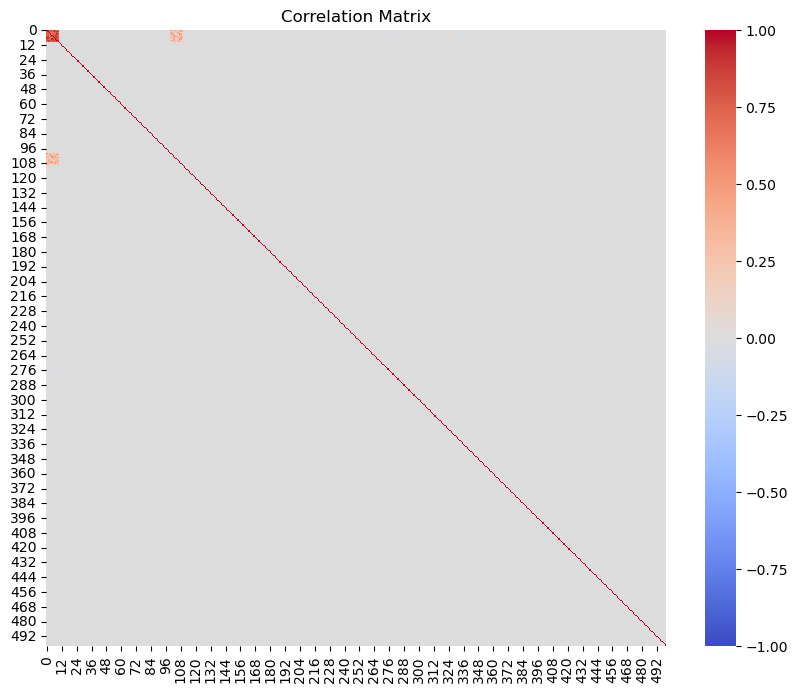

In [3]:
correlation_matrix = np.corrcoef(x_data, rowvar=False)

correlation_df = pd.DataFrame(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


c:\Users\Studia\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


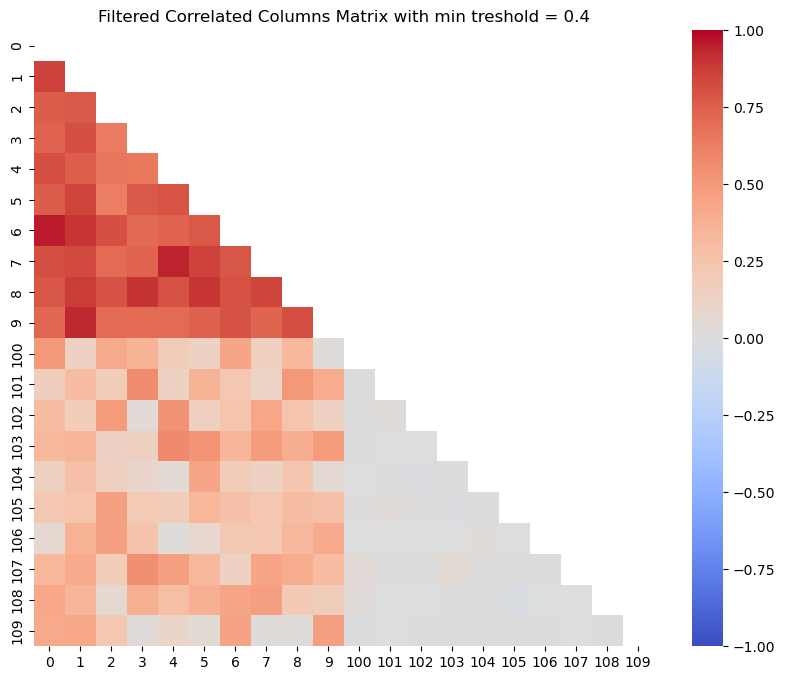

In [4]:
correlation_threshold = 0.4

mask = np.abs(correlation_matrix) > correlation_threshold
np.fill_diagonal(mask, False)

correlated_indices = np.where(mask)

unique_correlated_columns = np.unique(
    np.concatenate((correlated_indices[0], correlated_indices[1]))
    )

filtered_correlation_matrix = correlation_matrix[
    np.ix_(unique_correlated_columns, unique_correlated_columns)
    ]

filtered_correlation_df = pd.DataFrame(
    filtered_correlation_matrix, 
    index=unique_correlated_columns, 
    columns=unique_correlated_columns
    )

mask = np.triu(np.ones_like(filtered_correlation_df, dtype=bool))
filtered_correlation_df = filtered_correlation_df.mask(mask)

plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_correlation_df, cmap="coolwarm", annot=True,
    fmt=".2f", vmin=-1, vmax=1,
    xticklabels=unique_correlated_columns,
    yticklabels=unique_correlated_columns
    )

plt.title("Filtered Correlated Columns Matrix with min treshold = 0.4")
plt.show()


c:\Users\Studia\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


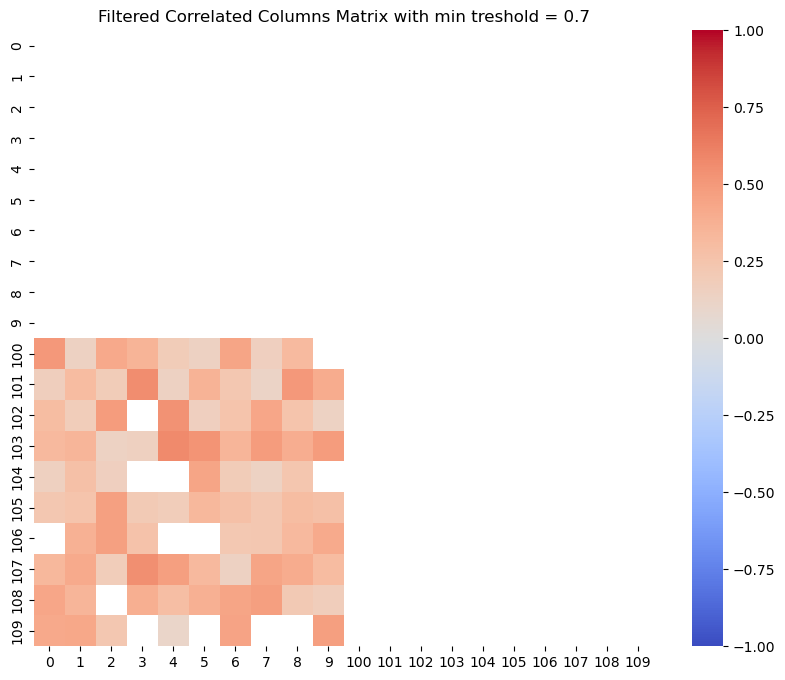

In [22]:
min_correlation_threshold = 0.1
max_correlation_threshold = 0.6

mask = (
    (np.abs(correlation_matrix) >= min_correlation_threshold) &
    (np.abs(correlation_matrix) <= max_correlation_threshold)
)
np.fill_diagonal(mask, False)

correlated_indices = np.where(mask)

unique_correlated_columns = np.unique(
    np.concatenate((correlated_indices[0], correlated_indices[1]))
    )

filtered_correlation_matrix = correlation_matrix[
    np.ix_(unique_correlated_columns, unique_correlated_columns)
    ]

filtered_mask = (
    (np.abs(filtered_correlation_matrix) >= min_correlation_threshold) &
    (np.abs(filtered_correlation_matrix) <= max_correlation_threshold)
)
np.fill_diagonal(filtered_mask, False)

filtered_correlation_df = pd.DataFrame(
    filtered_correlation_matrix, 
    index=unique_correlated_columns, 
    columns=unique_correlated_columns
    )

filtered_correlation_df = filtered_correlation_df.where(filtered_mask)

mask = np.triu(np.ones_like(filtered_correlation_df, dtype=bool))
filtered_correlation_df = filtered_correlation_df.mask(mask)

plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_correlation_df, cmap="coolwarm", annot=True,
    fmt=".2f", vmin=-1, vmax=1,
    xticklabels=unique_correlated_columns,
    yticklabels=unique_correlated_columns
    )

plt.title(f"Filtered Correlated Columns Matrix with treshold between {min_correlation_threshold} and {max_correlation_threshold}")
plt.show()


c:\Users\Studia\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


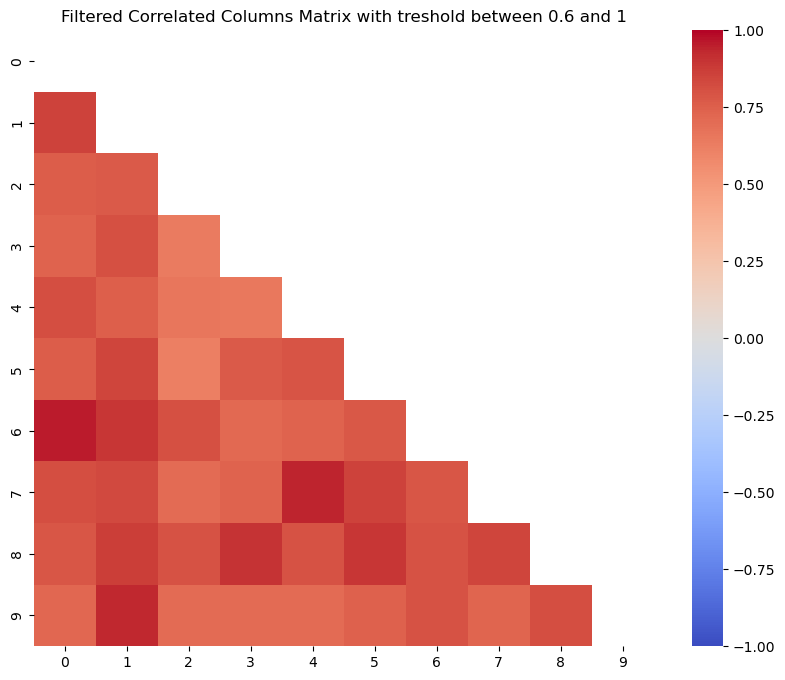

In [23]:
min_correlation_threshold = 0.6
max_correlation_threshold = 1.0

mask = (
    (np.abs(correlation_matrix) >= min_correlation_threshold) &
    (np.abs(correlation_matrix) <= max_correlation_threshold)
)
np.fill_diagonal(mask, False)

correlated_indices = np.where(mask)

unique_correlated_columns = np.unique(
    np.concatenate((correlated_indices[0], correlated_indices[1]))
    )

filtered_correlation_matrix = correlation_matrix[
    np.ix_(unique_correlated_columns, unique_correlated_columns)
    ]

filtered_mask = (
    (np.abs(filtered_correlation_matrix) >= min_correlation_threshold) &
    (np.abs(filtered_correlation_matrix) <= max_correlation_threshold)
)
np.fill_diagonal(filtered_mask, False)

filtered_correlation_df = pd.DataFrame(
    filtered_correlation_matrix, 
    index=unique_correlated_columns, 
    columns=unique_correlated_columns
    )

filtered_correlation_df = filtered_correlation_df.where(filtered_mask)

mask = np.triu(np.ones_like(filtered_correlation_df, dtype=bool))
filtered_correlation_df = filtered_correlation_df.mask(mask)

plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_correlation_df, cmap="coolwarm", annot=True,
    fmt=".2f", vmin=-1, vmax=1,
    xticklabels=unique_correlated_columns,
    yticklabels=unique_correlated_columns
    )

plt.title(f"Filtered Correlated Columns Matrix with treshold between {min_correlation_threshold} and {max_correlation_threshold}")
plt.show()
